In [121]:
#importing libraries
from string import punctuation
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [227]:
#Importing the dataset
df = pd.read_csv("C:/Users/MK064837/Google Drive/Simplilearn/DataSets/comcast/Comcast.csv")
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [123]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%y")
df.drop(columns=['Date_month_year'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 173.9+ KB


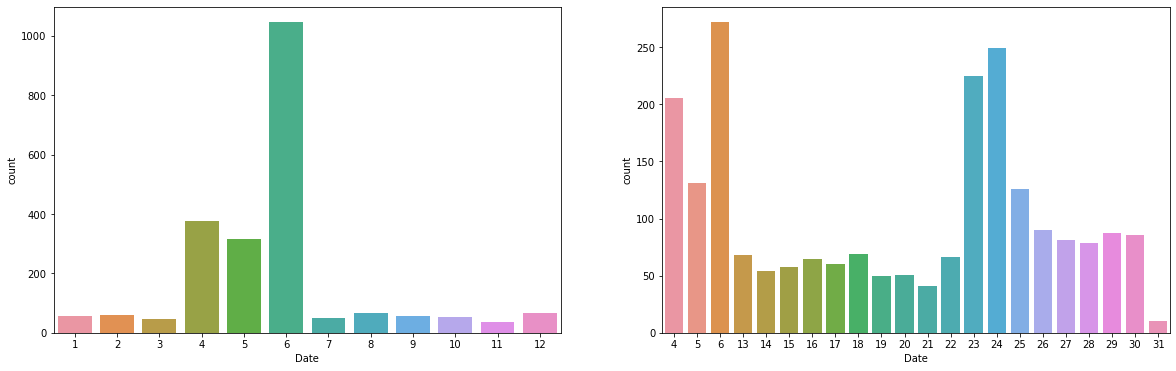

In [125]:
#Plotting no of complaints on each month and date
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(x=df['Date'].dt.month)
plt.subplot(122)
sns.countplot(x=df['Date'].dt.day)
plt.show()

In [126]:
#Tokenizing, removal of stopwords and punctuations and stemming
snow = SnowballStemmer('english')

df['Stop'] = df['Customer Complaint'].str.split(' ').apply(lambda x:' '.join(i for i in x if i not in (STOP_WORDS and punctuation)))
df['stem'] = df['Stop'].apply(lambda x:[snow.stem(i) for i in x.split(' ')])
df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Stop,stem
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Comcast Cable Internet Speeds,"[comcast, cabl, internet, speed]"
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Payment disappear service got disconnected,"[payment, disappear, servic, got, disconnect]"
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Speed and Service,"[speed, and, servic]"
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast Imposed a New Usage Cap of 300GB that ...,"[comcast, impos, a, new, usag, cap, of, 300gb,..."
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Comcast not working and no service to boot,"[comcast, not, work, and, no, servic, to, boot]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Service Availability,"[servic, avail]"
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Comcast Monthly Billing for Returned Modem,"[comcast, month, bill, for, return, modem]"
2221,331188,complaint about comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,complaint about comcast,"[complaint, about, comcast]"
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Extremely unsatisfied Comcast customer,"[extrem, unsatisfi, comcast, custom]"


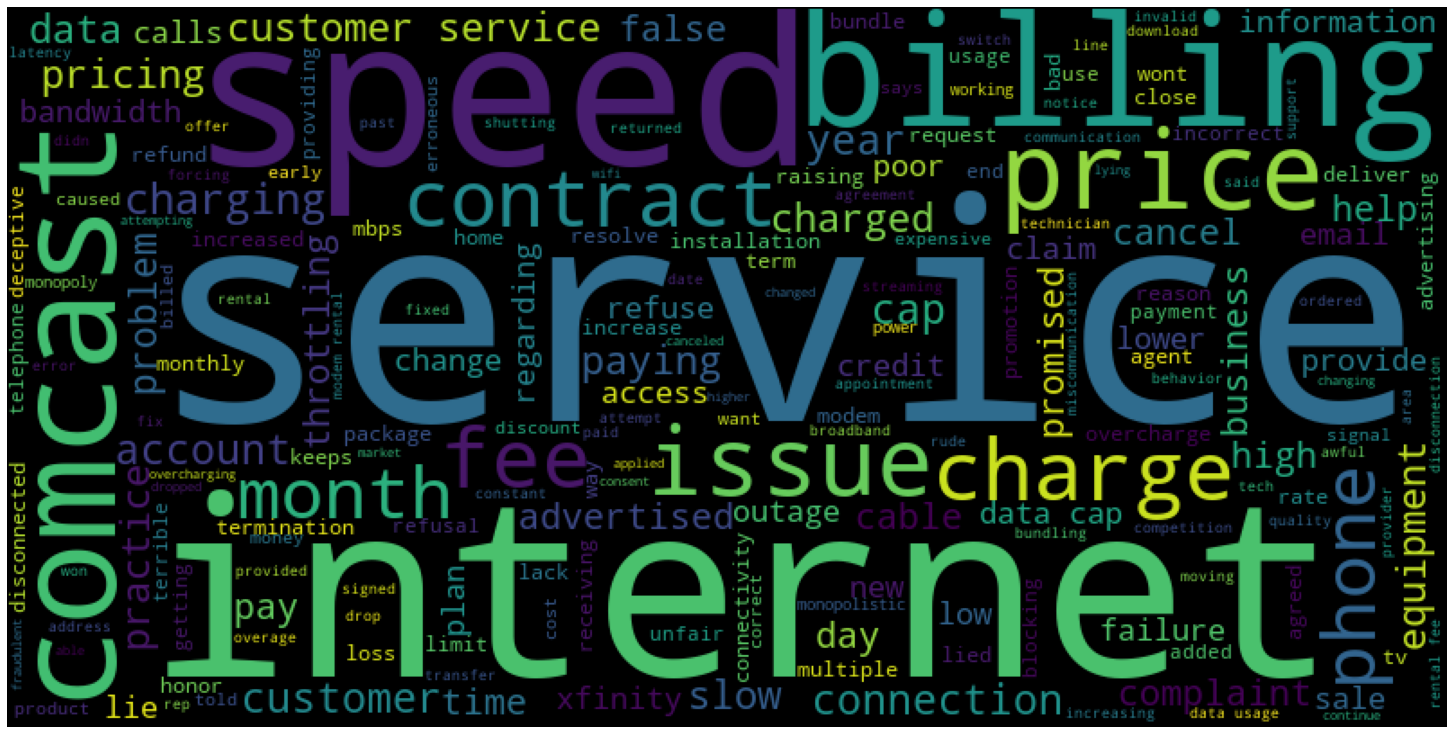

In [127]:
#Plotting wordcloud to identify most common issues
Test = df['Customer Complaint']
vecorize = CountVectorizer()

count_vectorizer = CountVectorizer(ngram_range=(2,3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=False,
                                   max_df = 0.7, max_features=10000)
test = count_vectorizer.fit_transform(Test)

for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

In [128]:
#New feature to classify Status
df['Stats']=['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in df['Status']]
df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Stop,stem,Stats
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Comcast Cable Internet Speeds,"[comcast, cabl, internet, speed]",Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Payment disappear service got disconnected,"[payment, disappear, servic, got, disconnect]",Closed
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Speed and Service,"[speed, and, servic]",Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast Imposed a New Usage Cap of 300GB that ...,"[comcast, impos, a, new, usag, cap, of, 300gb,...",Open
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Comcast not working and no service to boot,"[comcast, not, work, and, no, servic, to, boot]",Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Service Availability,"[servic, avail]",Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Comcast Monthly Billing for Returned Modem,"[comcast, month, bill, for, return, modem]",Closed
2221,331188,complaint about comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,complaint about comcast,"[complaint, about, comcast]",Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Extremely unsatisfied Comcast customer,"[extrem, unsatisfi, comcast, custom]",Closed


In [129]:
#Extracting quarter from date column 
df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['Quarter'].value_counts()

2    1738
3     171
1     159
4     156
Name: Quarter, dtype: int64

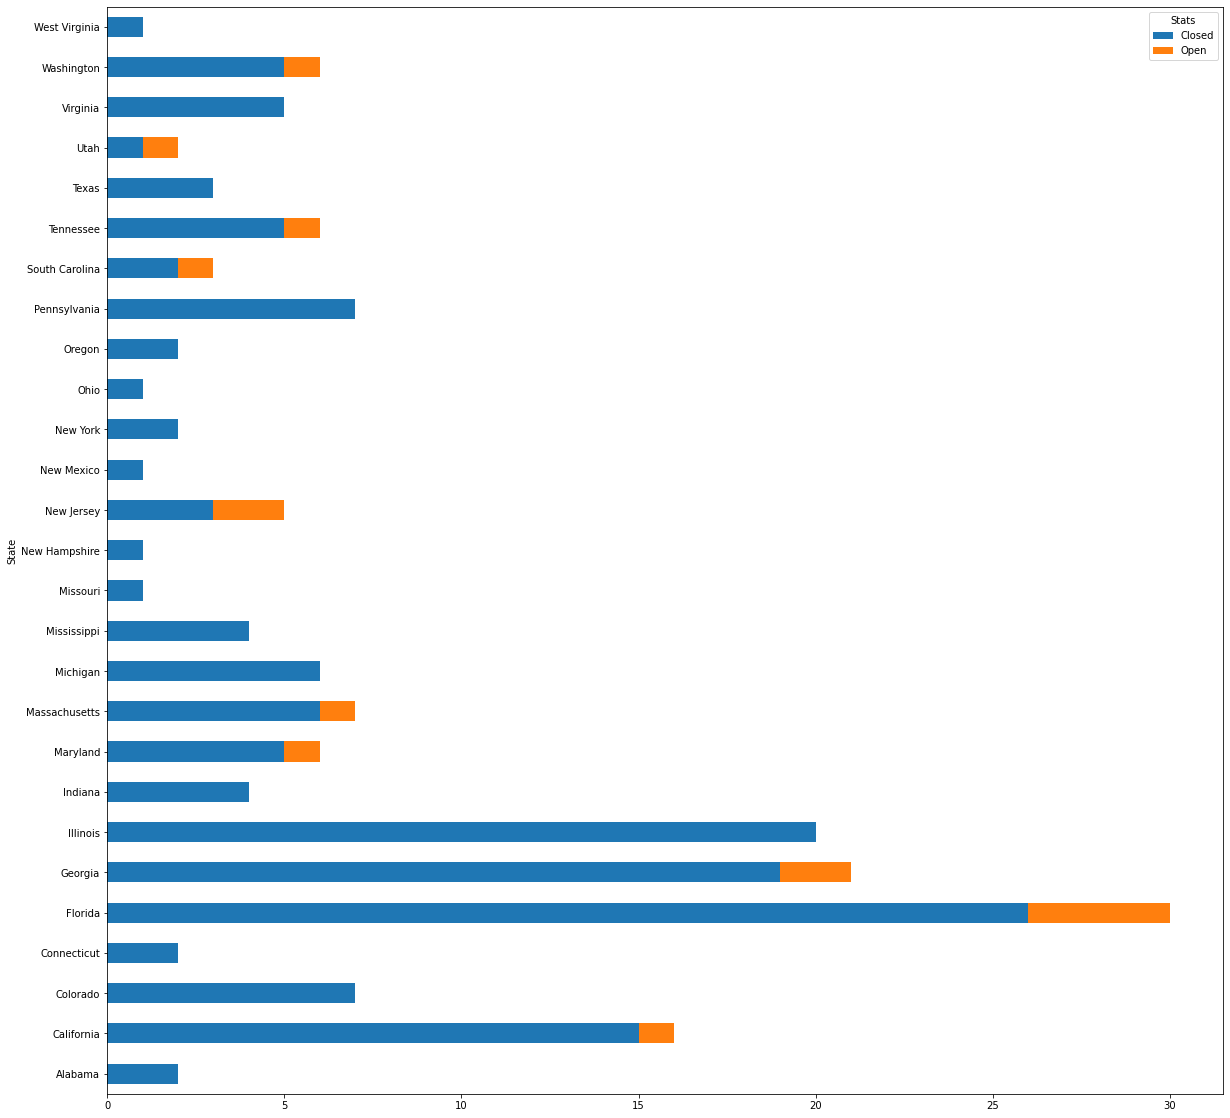

In [131]:
Complaint = df[(df['Quarter']==3)].groupby(['State','Stats']).size().unstack().fillna(0)
Complaint.plot(kind='barh',figsize=(20,20),stacked=True)
plt.show()

In [133]:
#State having the maximum complaints
df['State'].value_counts().head(5)

Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: State, dtype: int64

In [225]:
#Which state has the highest percentage of unresolved complaints
df['State'][df['Stats']=='Open'].groupby(by=df['State']).count().sort_values(ascending=False).head(5)

State
Georgia       80
California    61
Tennessee     47
Florida       39
Illinois      29
Name: State, dtype: int64

In [188]:
#percentage of complaints resolved till date, which were received through the Internet and customer care calls.
df[((df['Received Via']=='Internet') | (df['Received Via']=='Customer Care Call'))&(df['Stats']=='Closed')]

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Stop,stem,Stats,Quarter
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Comcast Cable Internet Speeds,"[comcast, cabl, internet, speed]",Closed,2
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Payment disappear service got disconnected,"[payment, disappear, servic, got, disconnect]",Closed,3
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Speed and Service,"[speed, and, servic]",Closed,2
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Comcast not working and no service to boot,"[comcast, not, work, and, no, servic, to, boot]",Closed,2
5,338519,ISP Charging for arbitrary data limits with ov...,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,ISP Charging for arbitrary data limits with ov...,"[isp, charg, for, arbitrari, data, limit, with...",Closed,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,254488,problems with internet service,2015-04-24,5:05:25 AM,Internet,York Haven,Pennsylvania,17370,Closed,No,problems with internet service,"[problem, with, internet, servic]",Closed,2
2219,213550,Service Availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Service Availability,"[servic, avail]",Closed,1
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Comcast Monthly Billing for Returned Modem,"[comcast, month, bill, for, return, modem]",Closed,1
2221,331188,complaint about comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,complaint about comcast,"[complaint, about, comcast]",Closed,3
